<a href="https://github.com/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/summerSchool/NN_2_ArithmeticSignsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arithmetic Signs Detection

In this exercise, the goal is to create a very basic system for detecting arithmetic signs (+, -, x, /) using neural networks based on a 3x3 point representation.

---
## Import the  libraries

In [20]:
# Import the torch library
import torch
# Import the Neural Network class
import torch.nn as nn
# Import the optimizers class
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

---
## Define inputs and outputs
Images of arithmetics signs are digitalized on 9 pixels (3x3).
<img src="./arithmDessins.PNG" width="400">

So, the inputs consist of 9 pixels (3x3) and the outputs correspond to the probability that the input is +, -, x, or /.

For a neural network, we have 1 layer of 4 neurones, connected each to the nine entries.

<img src="./NNArtithm.PNG" width="400">

In [22]:
# Define inputs and outputs based on the table
inputs = np.array([
    [0,1,0,
     1,1,1,
     0,1,0],
    [0,0,0,
     1,1,1,
     0,0,0],
    [1,0,1,
     0,1,0,
     1,0,1],
    [0,0,1,
     0,1,0,
     1,0,0]],float) 

outputs = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]], float)

operators = ['+','-','x','/']

In [4]:
# Convert inputs and outputs to tensors
tensor_X = torch.tensor(inputs, dtype=torch.float32)
tensor_y = torch.tensor(outputs, dtype=torch.float32)

---

## Choose the network model


---

Here, a very simple network:

An output layer consisting of 4 neurons (probability that the image is $+$, $-$, $\times$, or $/$), each connected to nine inputs (1 per pixel).


In [5]:
model = nn.Sequential()

In [6]:
# Add a linear layer with 9 inputs and 4 outputs, with bias
model.add_module('unique layer', nn.Linear(9, 4, bias=True))
# Add a sigmoid activation function
model.add_module('sigmoid', nn.Sigmoid())

---
## Error correction
Here, we specify that the error correction algorithm is *'adam'*, and that the calculated error is the mean of the squared errors (difference between the calculated output and the expected output). We also indicate that we want to see the learning accuracy appear.

In [7]:
# Use the mean squared error function
criterion = nn.MSELoss()
# Use the Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

---

## Train the network


In [9]:
# Launch training over nb_iter iterations
nb_iter = 100
# Define how often to print the loss and accuracy
step_to_print = nb_iter/10

# ++ Set the model to training mode ++
model.train()  

# Initialize a list to store losses for each epoch, just in case we want to visualize them later
losses = []
# Initialize a list to store accuracies for each epoch, if needed
accuracies = []

# ++ Train the model ++
# Loop over the number of iterations
for epoch in range(nb_iter):
    # Calculate outputs and loss
    outputs = model(tensor_X)

    loss = criterion(outputs, tensor_y)
    losses.append(loss.item())  # Store the loss for this epoch

    # Compute accuracy
    predicted_label = torch.argmax(outputs, dim=1)  # Get the predicted class
    actual_label = torch.argmax(tensor_y, dim=1)  # Get the actual class
    correct_labels = (predicted_label == actual_label).sum().item()
    total_labels = actual_label.size(0)
    accuracy = correct_labels / total_labels
    accuracies.append(accuracy)  # Store the accuracy for this epoch

    # Backpropagation and optimization
    # Reset gradients to zero
    optimizer.zero_grad()
    # Calculate gradients
    loss.backward()
    # Update weights
    optimizer.step()

    # For demonstration, display the loss every 100 epochs
    if (epoch+1) % step_to_print == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')
        print(f'Epoch [{epoch+1}/100], accuracy: {accuracy:.4f}')
        


Epoch [10/100], Loss: 0.2420
Epoch [10/100], accuracy: 0.0000
Epoch [20/100], Loss: 0.1820
Epoch [20/100], accuracy: 0.5000
Epoch [30/100], Loss: 0.1425
Epoch [30/100], accuracy: 0.7500
Epoch [40/100], Loss: 0.1167
Epoch [40/100], accuracy: 1.0000
Epoch [50/100], Loss: 0.0987
Epoch [50/100], accuracy: 1.0000
Epoch [60/100], Loss: 0.0852
Epoch [60/100], accuracy: 1.0000
Epoch [70/100], Loss: 0.0745
Epoch [70/100], accuracy: 1.0000
Epoch [80/100], Loss: 0.0658
Epoch [80/100], accuracy: 1.0000
Epoch [90/100], Loss: 0.0585
Epoch [90/100], accuracy: 1.0000
Epoch [100/100], Loss: 0.0523
Epoch [100/100], accuracy: 1.0000


## Display weights
Just for information, what are the weights ? 

We have 4 neurons (for detecting $+-\times/$), each connected to 9 entries, so we have $4 \times 9$ weights + $4$ (if we use *bias*).

In [10]:
# print the weights of the model
print("Model weights:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Layer: {name}")
        weights = param.data.detach().numpy()
        print("Weights:")
        for i in range(weights.shape[0]):
            print(f"Neuron {i}, operator '{operators[i]}', weights: {weights[i]}")
    if 'unique_layer.bias' in name:
        print("weights accorded to bias for +,-,x,/ neurons:")
        print(param.data)

Model weights:
Layer: unique layer.weight
Weights:
Neuron 0, operator '+', weights: [-0.40065297  0.6428129  -0.32760692  0.14173144 -0.5340709   0.11896726
 -0.283385    1.06438    -0.3757756 ]
Neuron 1, operator '-', weights: [-0.6239944  -1.1029513  -0.4062002   0.5992979  -0.4657181   0.9089273
 -0.48457137 -0.9454679  -0.18479633]
Neuron 2, operator 'x', weights: [ 1.0187498  -0.6548605   0.01411864 -0.32514903 -0.54133654 -0.38661584
  0.25557005 -0.26465258  1.0241786 ]
Neuron 3, operator '/', weights: [-0.5415256  -0.631499    0.45331788 -0.4231824  -0.28617308 -0.61042494
  0.53529084 -0.23273978 -0.72857773]
Layer: unique layer.bias
Weights:
Neuron 0, operator '+', weights: -0.5787397623062134
Neuron 1, operator '-', weights: -0.24671778082847595
Neuron 2, operator 'x', weights: -0.7383522987365723
Neuron 3, operator '/', weights: -0.18434934318065643


---

## Plot the evolution of error and accuracy



#### Trace the error correction
- Error should decrease, if not, there is a problem in the data, or in the model...

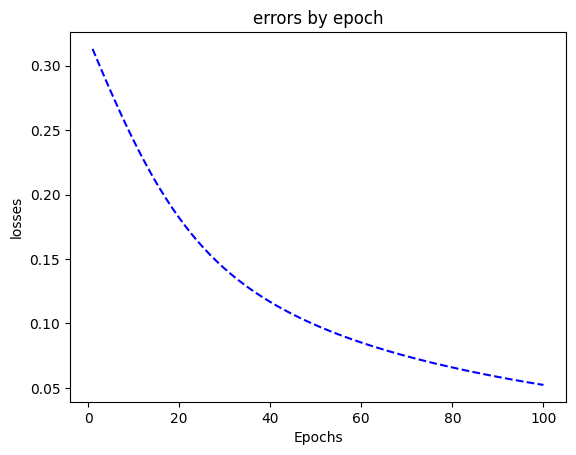

In [11]:
## dessiner la courbe de précision

epochs = range(1, len(losses) + 1)

plt.plot(epochs, losses, 'b--')
plt.title('errors by epoch')
plt.xlabel('Epochs')
plt.ylabel('losses')

plt.show()

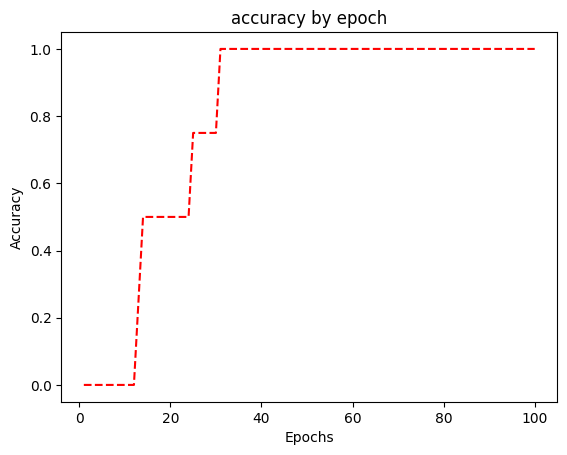

In [12]:

# draw the loss evolution in blue
plt.plot(epochs, accuracies, 'r--')
plt.title('accuracy by epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

---
## Using the network
Testing initial inputs:

In [13]:
predictions = model(tensor_X)
predictions = predictions.detach().numpy()  # Convert the tensor to numpy array for easier handling
print(predictions)

[[0.7016319  0.22224523 0.05161409 0.08561678]
 [0.29899    0.6890731  0.12010316 0.1818104 ]
 [0.07584197 0.08226235 0.73748326 0.32038194]
 [0.15138201 0.1675338  0.26697984 0.62670016]]


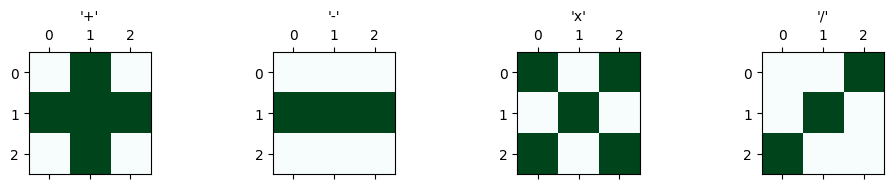

In [ ]:
fig, axes = plt.subplots(1, len(inputs), figsize=(10, 2))  

for i in range(len(inputs)):
    axes[i].matshow(np.reshape(inputs[i],(3,3)), cmap='BuGn')
    title = f"pred '{operators[np.argmax(predictions[i])]}', certitude {np.max(predictions[i])*100:.2f} %"
    axes[i].set_title(title, fontsize=10)

plt.tight_layout()
plt.show()



### Degraded inputs

Let's imagine we have poor resolution or photos with noise



In [15]:
input_tests = np.array([
    [0,1,0, 1,1,0, 0,1,0],
    [0,0,0, 0,1,1, 0,0,0],
    [1,0,0, 0,0,0, 1,0,1],
    [0,0,1, 0,0,0, 1,0,0]],float) 

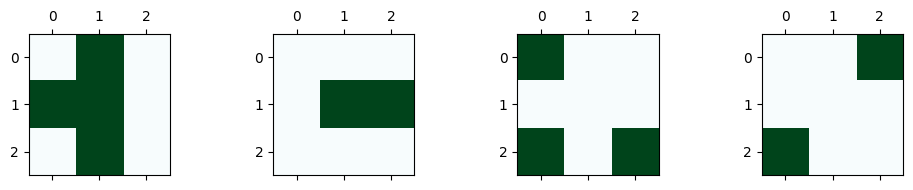

In [16]:
fig, axes = plt.subplots(1, 4, figsize=(10, 2))  
for i in range(len(input_tests)):
    axes[i].matshow(np.reshape(input_tests[i],(3,3)), cmap='BuGn')
plt.tight_layout()
plt.show()

### Compute estimation
Let's ask to the neural network

In [17]:
tensor_test_X = torch.tensor(input_tests, dtype=torch.float32)
predictions_test = model(tensor_test_X)
predictions_test = predictions_test.detach().numpy()  # Convert the tensor to numpy array for easier handling
print(predictions_test)

[[0.67614543 0.1032562  0.07416861 0.14704807]
 [0.2701536  0.54896545 0.15891749 0.2533268 ]
 [0.162662   0.17652366 0.82637435 0.2851287 ]
 [0.23330691 0.24278162 0.38493258 0.6908849 ]]


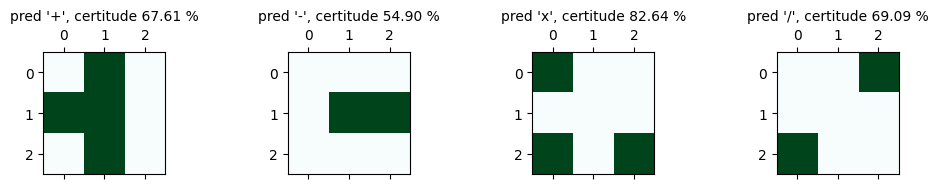

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(10, 2))  # 1 ligne, 4 colonnes

for i in range(len(input_tests)):
#    plt.figure(figsize=(1, 1))
    axes[i].matshow(np.reshape(input_tests[i],(3,3)), cmap='BuGn')
    title = f"pred '{operators[np.argmax(predictions_test[i])]}', certitude {np.max(predictions_test[i])*100:.2f} %"
    axes[i].set_title(title, fontsize=10)
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


**This is the main strength of a neural network !** : Be able to *"guess"*, to *"understand"* from unknown inputs!

- <red>**NO!**</red> the neural network just compute $f(weights \times entries)$. It will always propose a value.
- It has no capacity for understanding
- antropomorphims is the attribution of human traits to animals
- **personification** is the attribution of human characteristics to abstract ideas, natural phenomena, or inanimate objects.
- *personification* can be used to illustrate, but be careful, numerical AI just compute figures...
